In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Import file
df = pd.read_csv('all_df.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df = df.drop(df.index[358]).reset_index(drop=True)
df = df.drop(['Unnamed: 0', 'Avg. Session Duration Seconds.1'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 84 columns):
Date                                  392 non-null datetime64[ns]
Revenue                               392 non-null float64
Users                                 392 non-null float64
Sessions                              392 non-null float64
Transactions                          392 non-null float64
Quantity                              392 non-null float64
Bounces                               392 non-null float64
Pages / Session                       392 non-null float64
Avg. Session Duration                 392 non-null object
Session Duration                      392 non-null object
Avg. Session Duration Seconds         392 non-null float64
('Users', '(Other)')                  392 non-null float64
('Users', 'Affiliate')                392 non-null float64
('Users', 'CSE')                      392 non-null float64
('Users', 'Direct')                   392 non-null float64
('Use

In [22]:
#Create a new column with 1 if they reached or exceeded goal and 0 if they did not
df['Goal Reached'] = np.where(df['Revenue'] >= df['Daily Revenue Demand Plan'], 1, 0)

print(df['Goal Reached'].head())

0    0
1    0
2    0
3    0
4    0
Name: Goal Reached, dtype: int32


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#Create the column to be predicted
y = df['Goal Reached'].values
X = df[['SS', 'MD', 'GWP', 'FF', 'DOTD', 'NA', 'SOS', 'SWP', 'EA', 'Email Day', 'Daily Revenue Demand Plan', 'Daily Traffic Plan', 'Orders Plan', 'Units Plan']].values

#Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21, stratify=y)

In [24]:
#knn method
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Test set predictions:\n {}".format(y_pred))

print "Accuracy Score:", knn.score(X_test, y_test)

Test set predictions:
 [0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0]
Accuracy Score: 0.645569620253


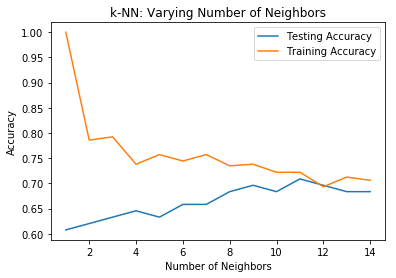

In [10]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [25]:
#knn method with number of neighbors = 11
knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Test set predictions:\n {}".format(y_pred))

print "Accuracy Score Train:", knn.score(X_train, y_train)
print "Accuracy Score Test:", knn.score(X_test, y_test)

Test set predictions:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0]
Accuracy Score Train: 0.722044728435
Accuracy Score Test: 0.708860759494


In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Confusion Matrix
print(confusion_matrix(y_test, y_pred))

#Classification Report
print(classification_report(y_test, y_pred))

[[51  3]
 [20  5]]
             precision    recall  f1-score   support

          0       0.72      0.94      0.82        54
          1       0.62      0.20      0.30        25

avg / total       0.69      0.71      0.65        79



In [27]:
#clf
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train, y_train)
#MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
acc_train = clf.score(X_train, y_train)
acc_test = clf.score(X_test, y_test)

print 'Accuracy Score Training Set:', acc_train
print 'Accuracy Score Test Set:', acc_test


Accuracy Score Training Set: 0.41214057508
Accuracy Score Test Set: 0.544303797468


In [19]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

[[54  0]
 [25  0]]
             precision    recall  f1-score   support

          N       0.68      1.00      0.81        54
          Y       0.00      0.00      0.00        25

avg / total       0.47      0.68      0.56        79



C:\Users\jrenaud\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


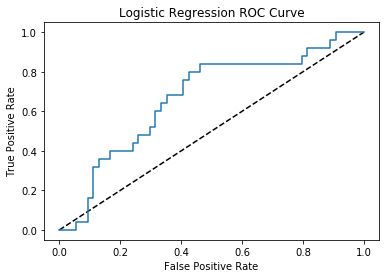

In [29]:
from sklearn.metrics import roc_curve

y_pred_prob = logreg.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label= 'Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')

plt.show();

In [33]:
#Compute AUC score
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred_prob)

print "ROC AUC:", roc_auc

ROC AUC: 0.668148148148


In [32]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(logreg, X, y, cv=5, scoring ='roc_auc')

print "AUC scores computed using 5-fold cross-validation: {}".format(cv_scores)

AUC scores computed using 5-fold cross-validation: [ 0.60962963  0.59111111  0.44679245  0.68226415  0.48075472]


In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors':np.arange(1, 50)}

knn_cv = GridSearchCV(knn, param_grid, cv=5)

knn_cv.fit(X, y)

print "Tuned Logistic Regression Parameters: {}".format(knn_cv.best_params_)
print "Best score is {}".format(knn_cv.best_score_)

Tuned Logistic Regression Parameters: {'n_neighbors': 42}
Best score is 0.673469387755


In [36]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'max_features': 1, 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3}
Best score is 0.663265306122
